In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat

from aux import loadmat_h5
from disp import set_font_size

DATA_FILE = 'data/christa/ipiFreqTuning_forConnectivity.mat'
CELL_FILE = 'data/christa/VLP_knownAUD_neurons_copiedFromFlyWireDatabase_20200617.xlsx'
CXN_FILE = 'data/christa/allAudNeurons_connMat_noDupSyn.mat'

FPS = 8.5

In [2]:
data = loadmat(DATA_FILE)

ipi = data['ipi'][0]
ipi_rsps = data['ipiResponsesPerFly'][0]
ipi_rsps_zscored = data['ipiResponsesPerFly_zscored'][0]
ipi_integrals_pertime_collated = data['ipi_integrals_pertime_collated']

freq = data['freq'][0]
freq_rsps = data['freqResponsesPerFly'][0]
freq_rsps_zscored = data['freqResponsesPerFly_zscored'][0]
freq_integrals_pertime_collated = data['freq_integrals_pertime_collated']

integrals_pertime_all_collated_lineID = data['integrals_pertime_all_collated_lineID']

In [3]:
# munge
for crsp, rsp in enumerate(ipi_rsps):
    if rsp.ndim == 2:
        ipi_rsps[crsp] = rsp[:, :, None]
        
for crsp, rsp in enumerate(ipi_rsps_zscored):
    if rsp.ndim == 2:
        ipi_rsps_zscored[crsp] = rsp[:, :, None]
        
for crsp, rsp in enumerate(freq_rsps):
    if rsp.ndim == 2:
        freq_rsps[crsp] = rsp[:, :, None]
        
for crsp, rsp in enumerate(freq_rsps_zscored):
    if rsp.ndim == 2:
        freq_rsps_zscored[crsp] = rsp[:, :, None]
        
# fill missing last line of freq responses per fly with nans
freq_rsps[-1] = np.nan * np.zeros((5, 163, 1))
freq_rsps_zscored[-1] = np.nan * np.zeros((5, 163, 1))

In [4]:
# zero responses by subtracting time-avd pre-stim period
ipi_rsps_normed = np.repeat(None, 30)
ipi_rsps_means = np.repeat(None, 30)
ipi_rsps_stds = np.repeat(None, 30)

for crsp, rsp in enumerate(ipi_rsps_zscored):
    t = np.arange(rsp.shape[1]) / FPS
    mt_pre = t < 5
    
    rsp_normed = np.nan * np.zeros(rsp.shape)
    for cipi, rsp_flies in enumerate(rsp):
        for cfly, rsp_fly in enumerate(rsp_flies.T):
            rsp_normed[cipi, :, cfly] = rsp_fly - np.nanmean(rsp_fly[mt_pre])
    ipi_rsps_normed[crsp] = rsp_normed
    ipi_rsps_means[crsp] = rsp_normed.mean(axis=2)
    ipi_rsps_stds[crsp] = rsp_normed.std(axis=2)
    
# zero responses by subtracting time-avd pre-stim period
freq_rsps_normed = np.repeat(None, 30)
freq_rsps_means = np.repeat(None, 30)
freq_rsps_stds = np.repeat(None, 30)

for crsp, rsp in enumerate(freq_rsps_zscored):
    t = np.arange(rsp.shape[1]) / FPS
    mt_pre = t < 5
    
    rsp_normed = np.nan * np.zeros(rsp.shape)
    for cipi, rsp_flies in enumerate(rsp):
        for cfly, rsp_fly in enumerate(rsp_flies.T):
            rsp_normed[cipi, :, cfly] = rsp_fly - np.nanmean(rsp_fly[mt_pre])
    freq_rsps_normed[crsp] = rsp_normed
    freq_rsps_means[crsp] = rsp_normed.mean(axis=2)
    freq_rsps_stds[crsp] = rsp_normed.std(axis=2)
    
np.save('data/simple/ipi_freq_timecourses.npy', np.array([
    {
        'ipi': ipi,
        'ipi_rsps_means': ipi_rsps_means,
        'ipi_rsps_stds': ipi_rsps_stds,
        
        'freq': freq,
        'freq_rsps_means': freq_rsps_means,
        'freq_rsps_stds': freq_rsps_stds,
    }
]))

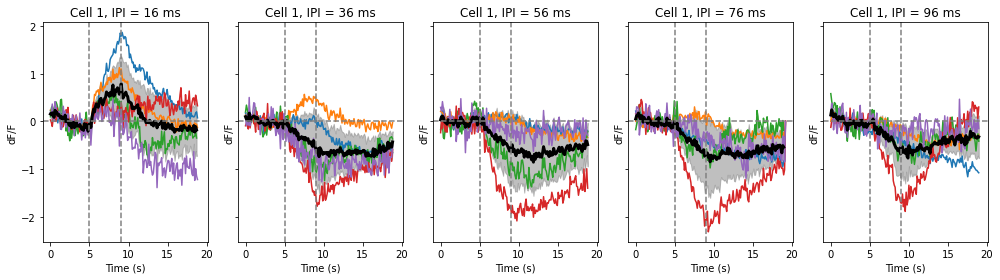

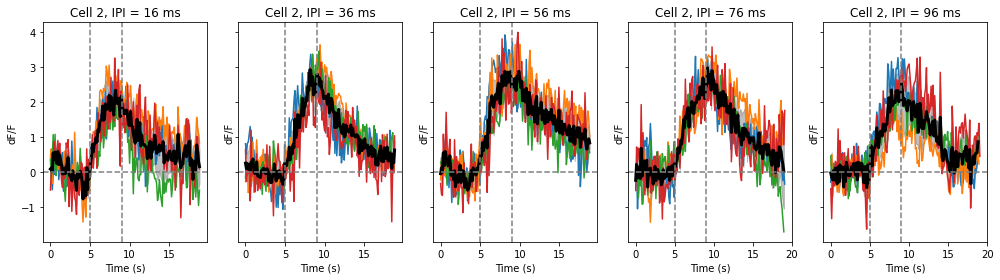

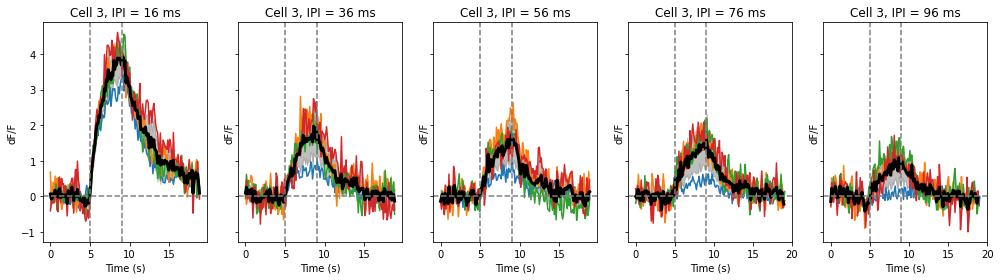

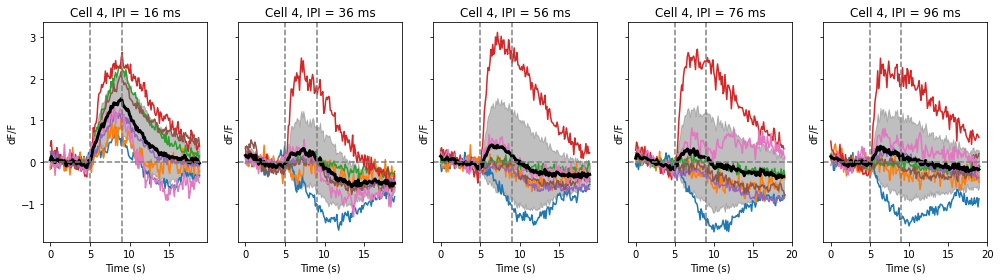

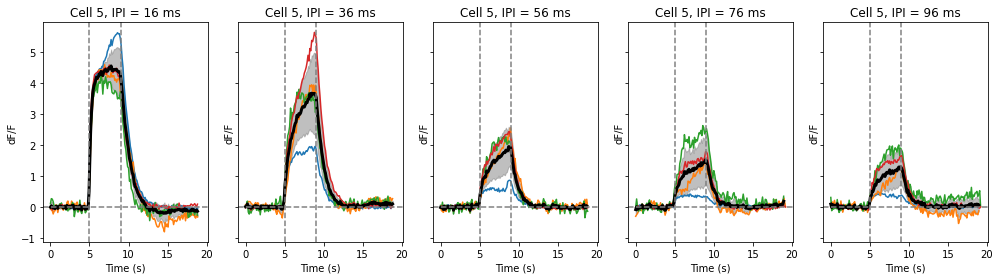

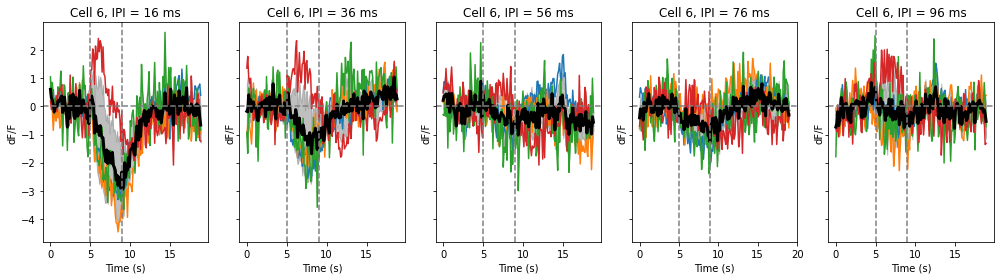

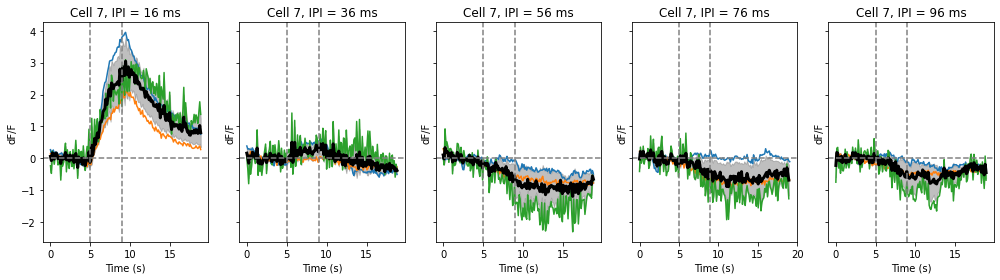

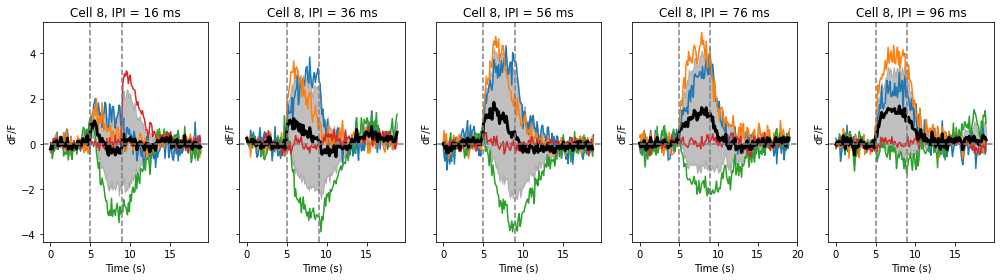

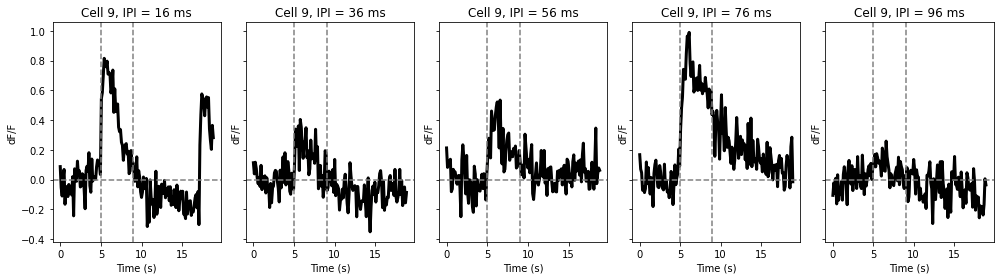

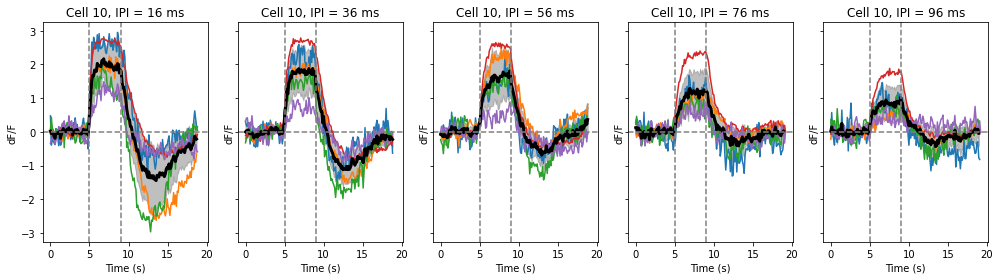

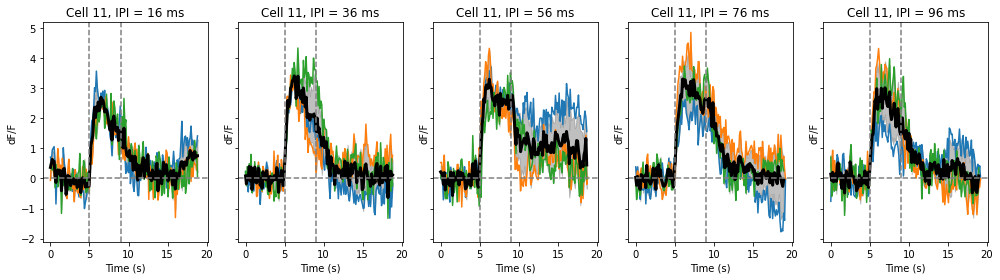

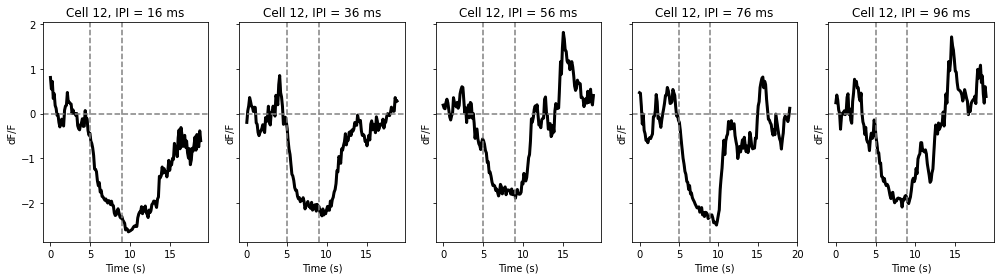

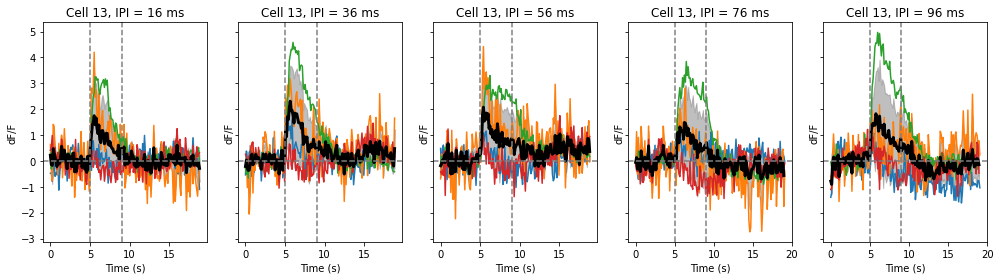

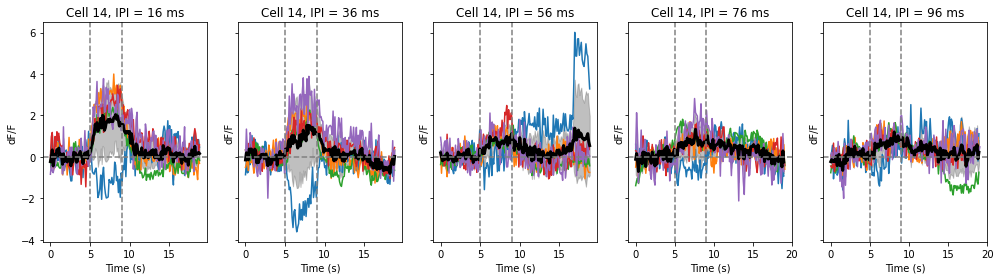

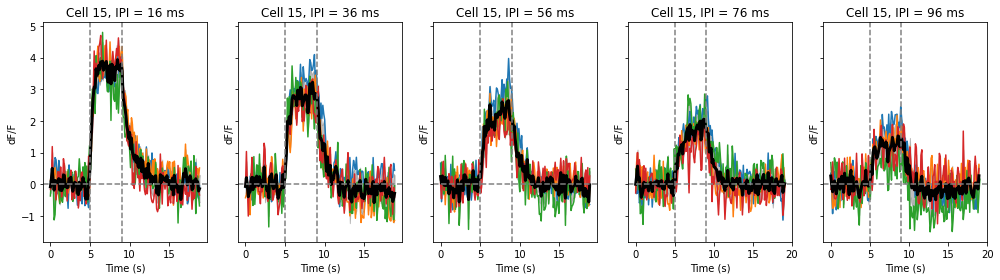

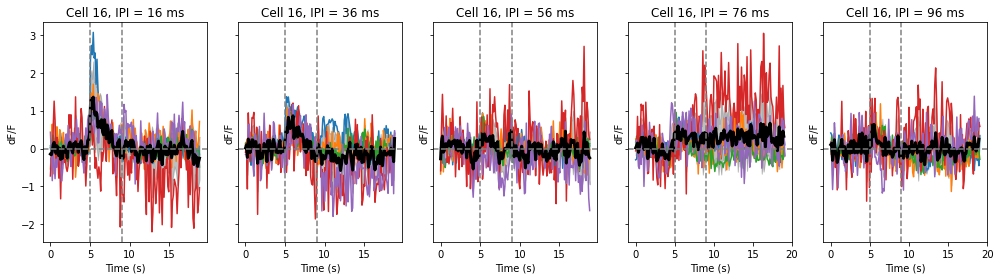

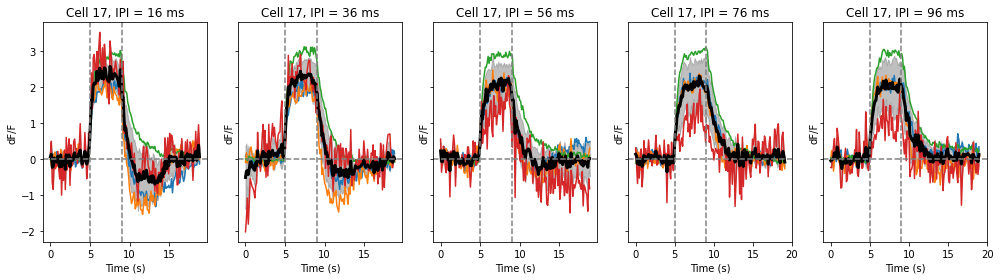

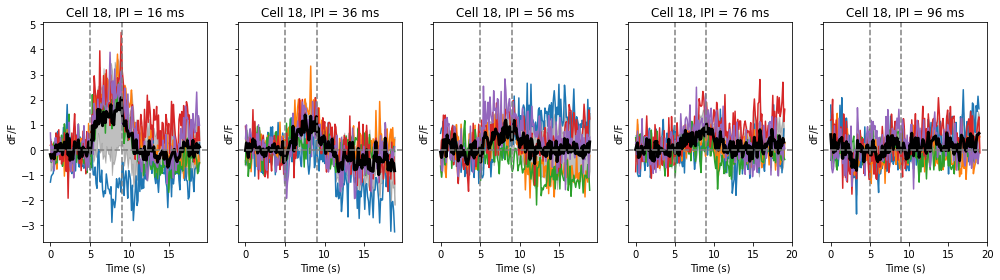

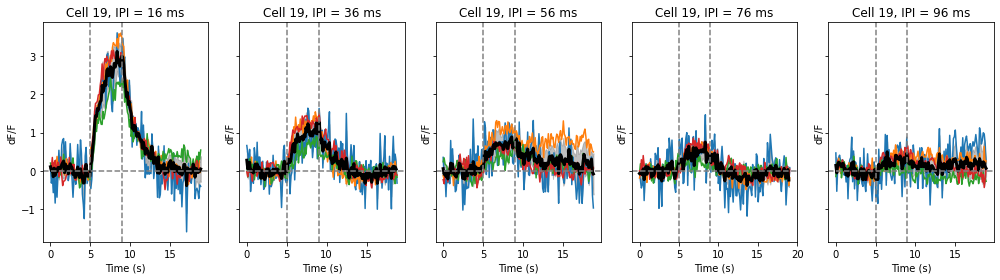

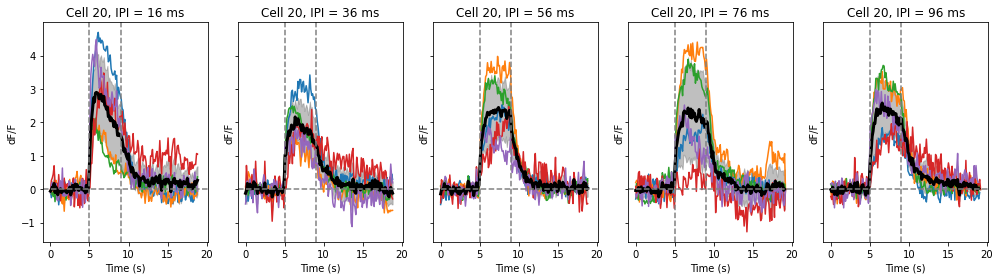

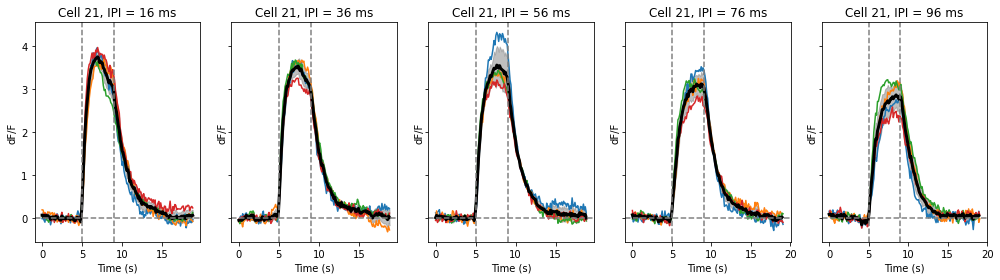

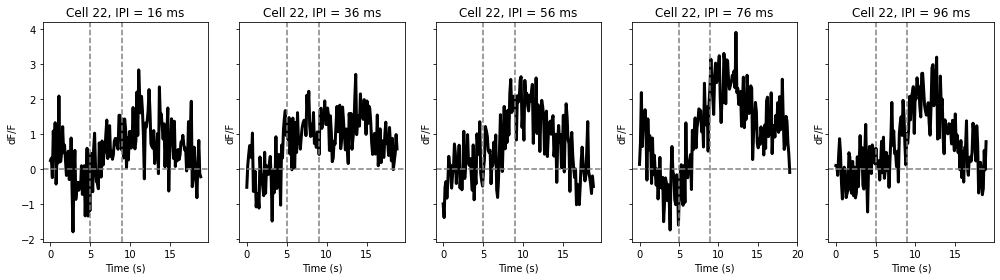

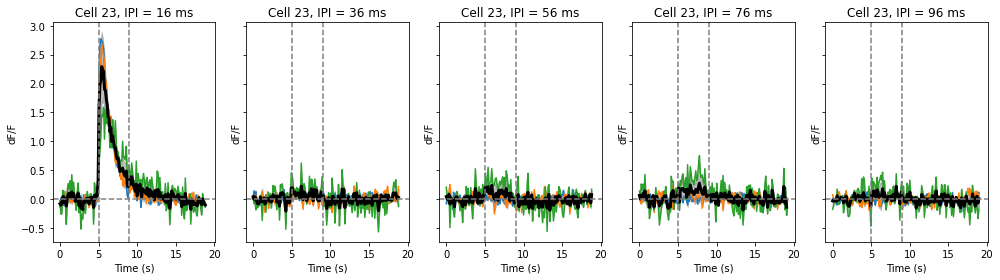

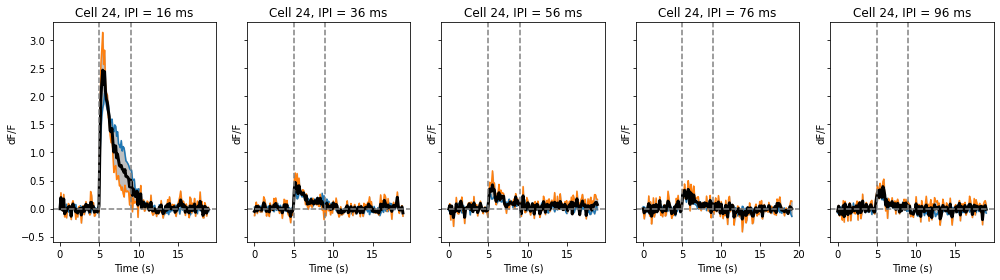

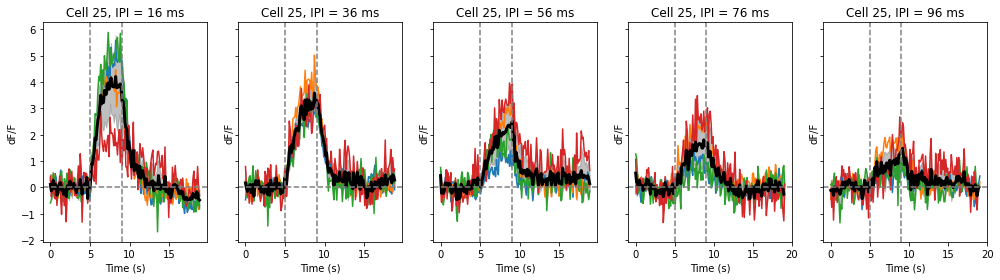

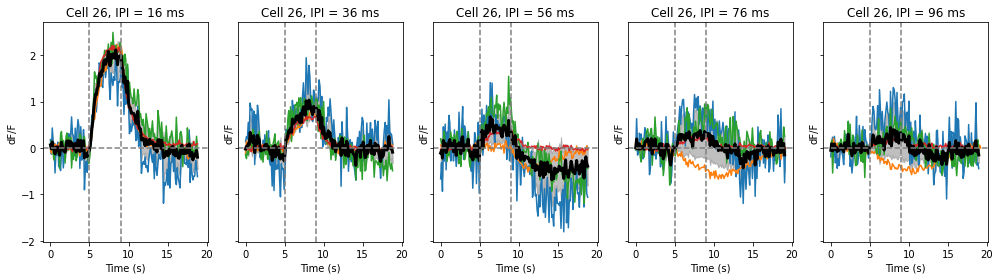

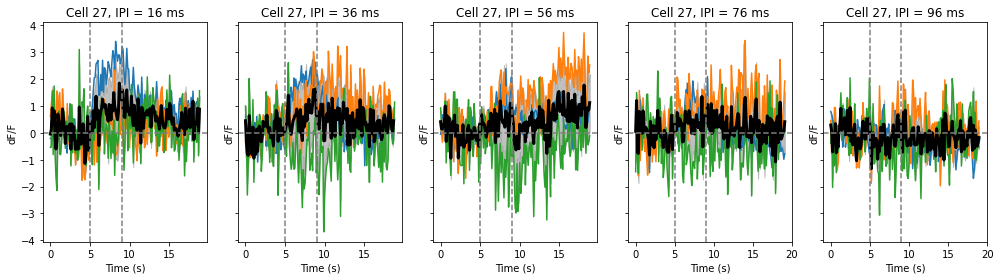

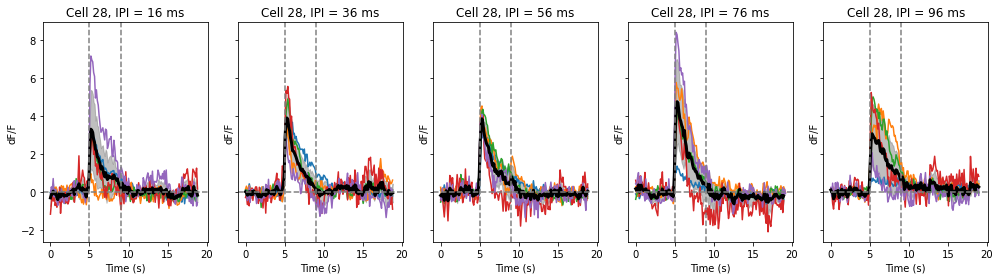

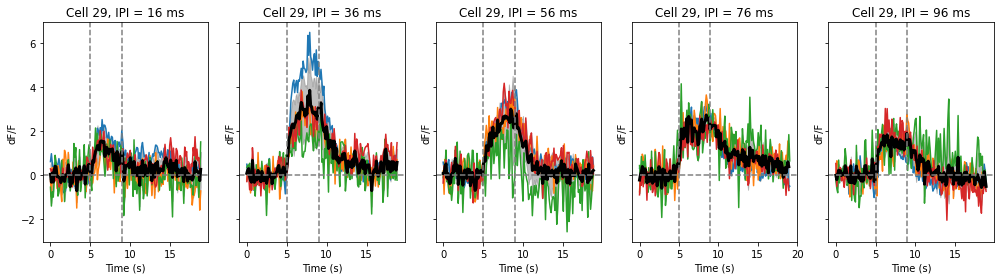

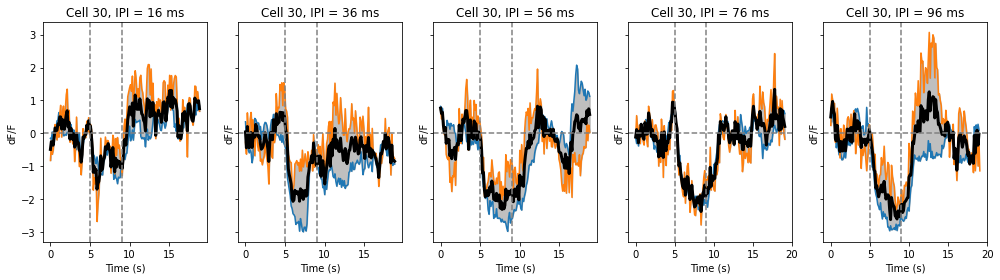

In [5]:
# print all ipi tuning curves
for crsp, (rsp, rsp_mean, rsp_std) in enumerate(zip(ipi_rsps_normed, ipi_rsps_means, ipi_rsps_stds)):
    t = np.arange(rsp.shape[1])/FPS
    fig, axs = plt.subplots(1, 5, figsize=(14, 4), sharey=True, tight_layout=True)
    for cax, (ax, ipi_) in enumerate(zip(axs, ipi)):
        ax.plot(t, rsp[cax])
        ax.plot(t, rsp_mean[cax], lw=3, c='k')
        ax.fill_between(t, rsp_mean[cax] - rsp_std[cax], rsp_mean[cax] + rsp_std[cax], color='gray', alpha=.5)
        ax.axhline(0, color='gray', ls='--')
        ax.axvline(5, color='gray', ls='--')
        ax.axvline(9, color='gray', ls='--')
        ax.set_title(f'Cell {crsp+1}, IPI = {ipi_} ms')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('dF/F')

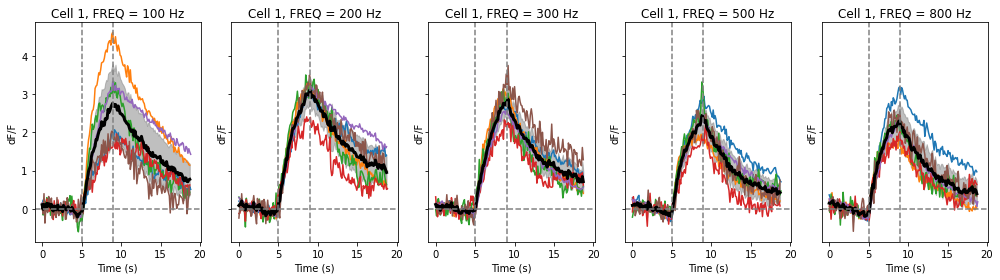

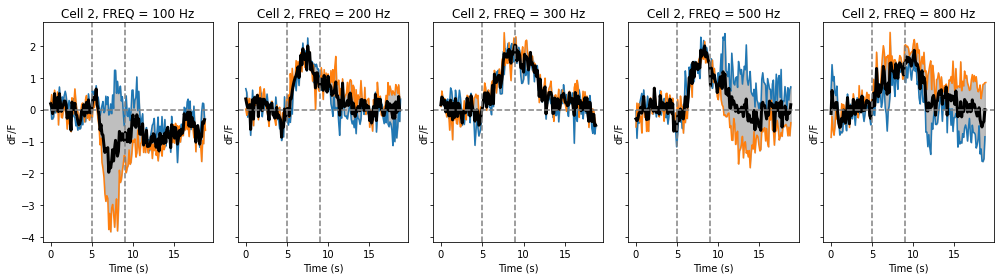

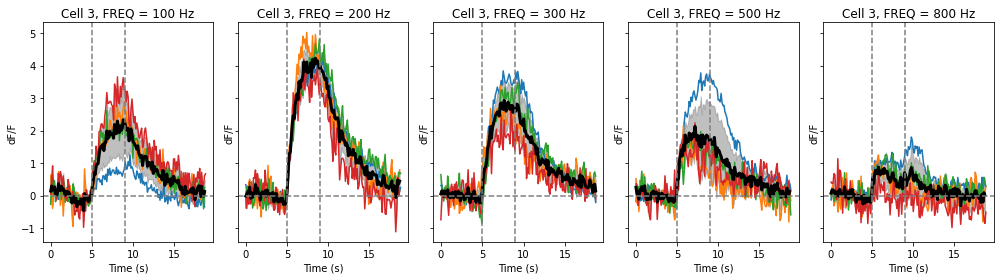

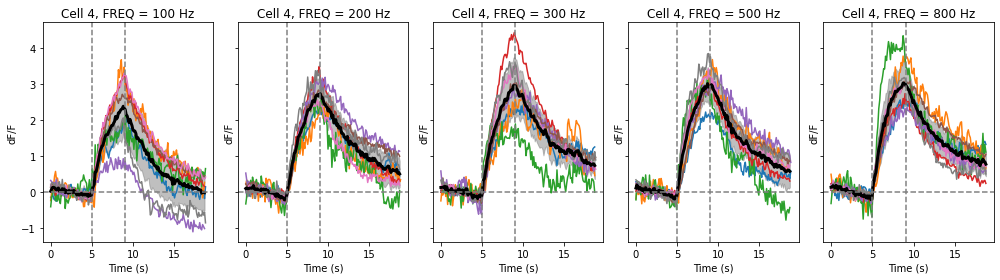

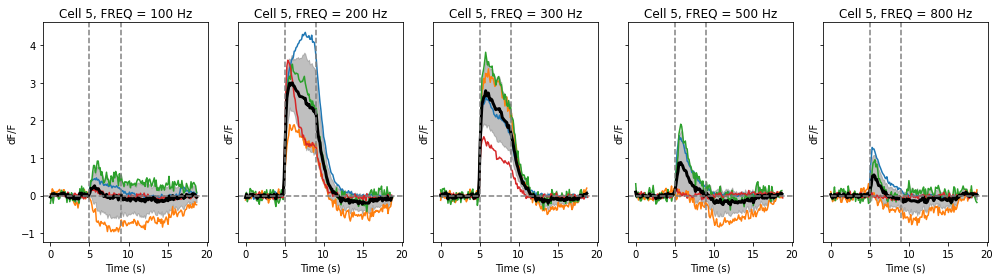

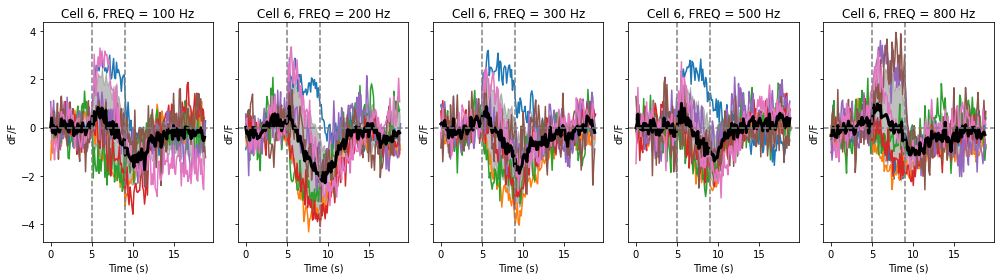

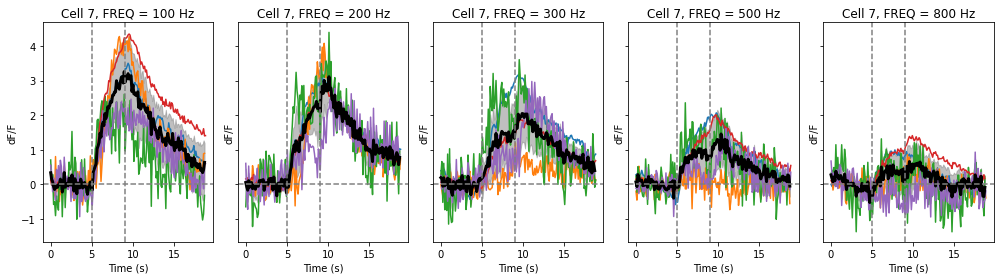

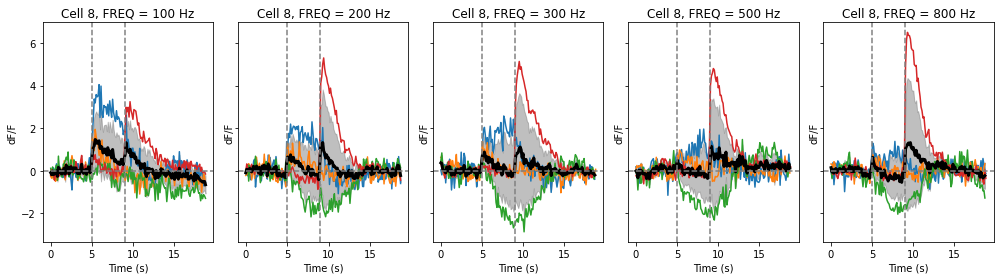

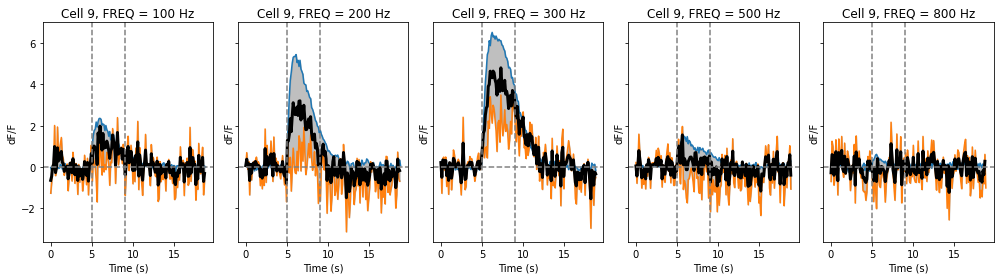

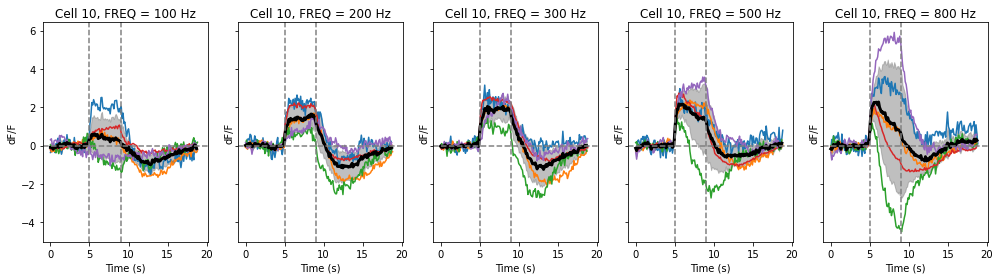

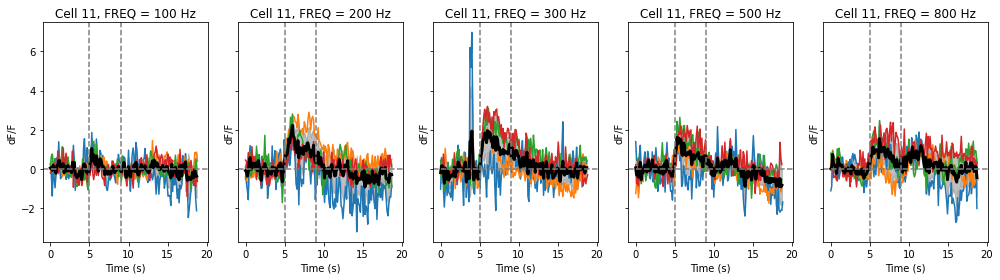

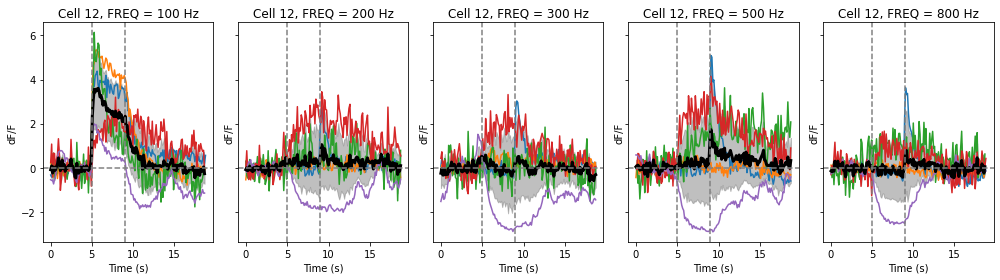

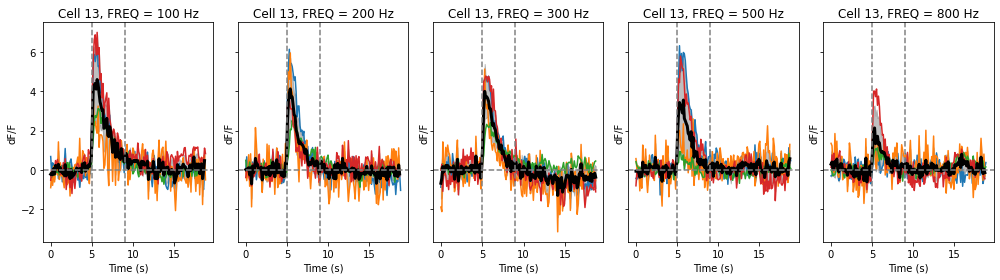

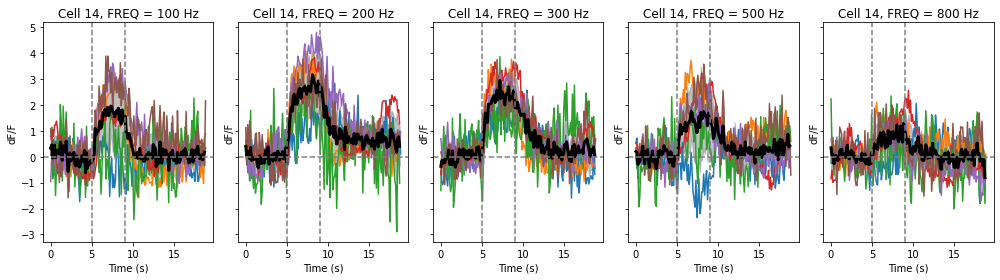

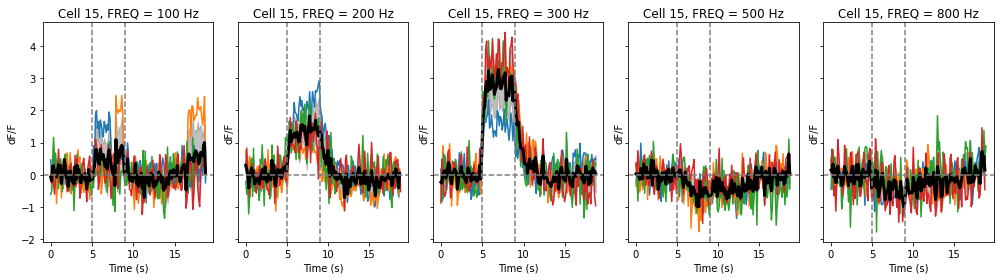

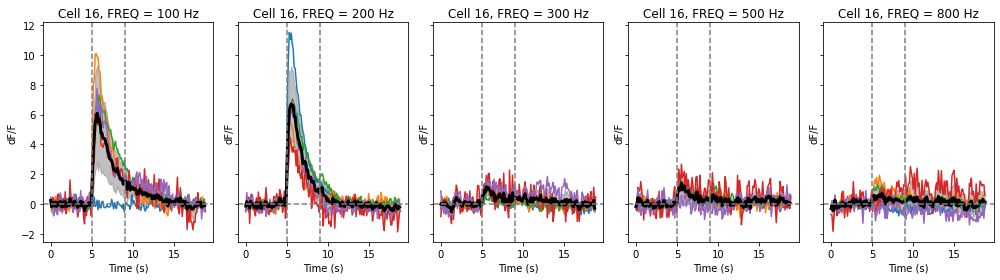

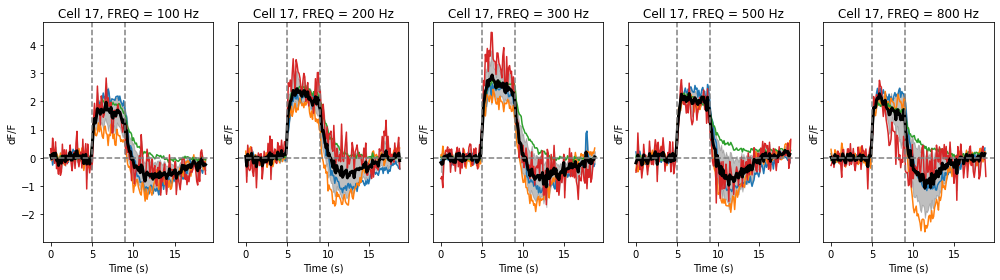

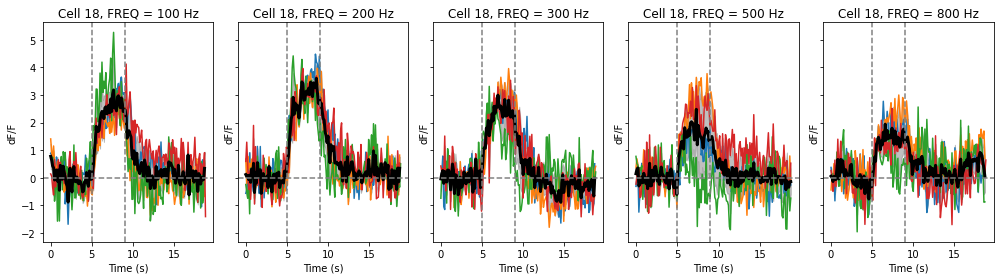

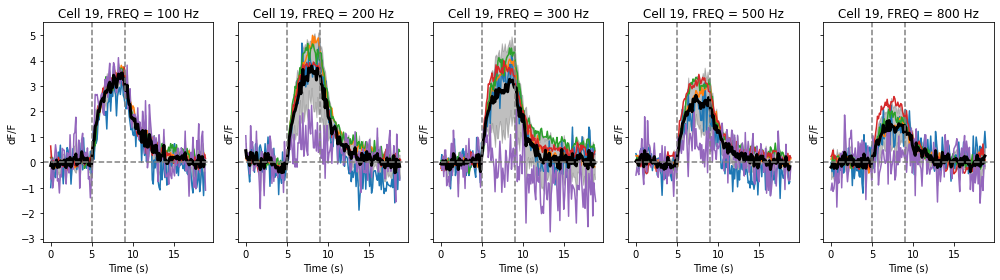

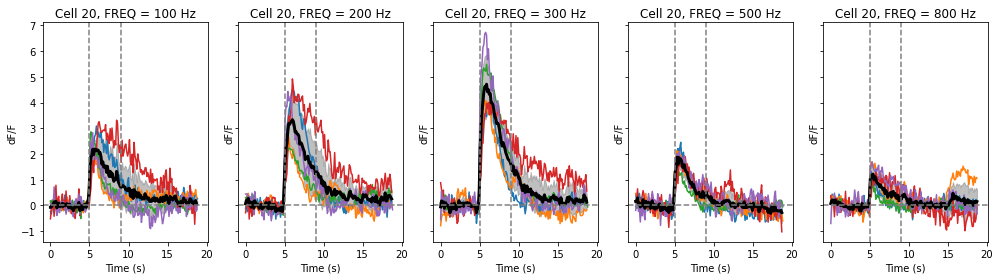

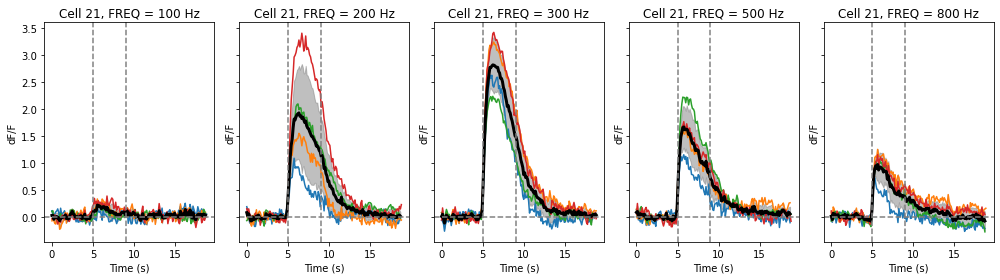

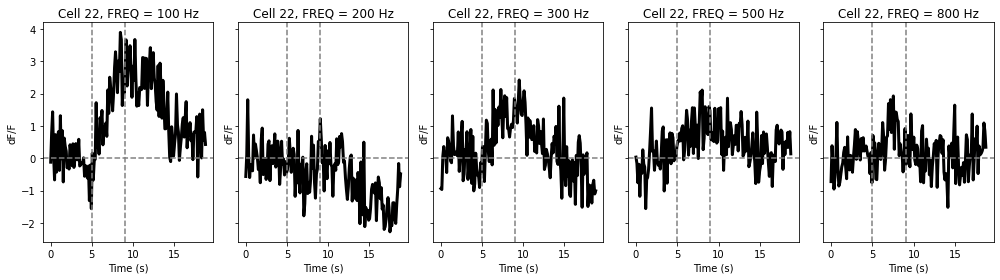

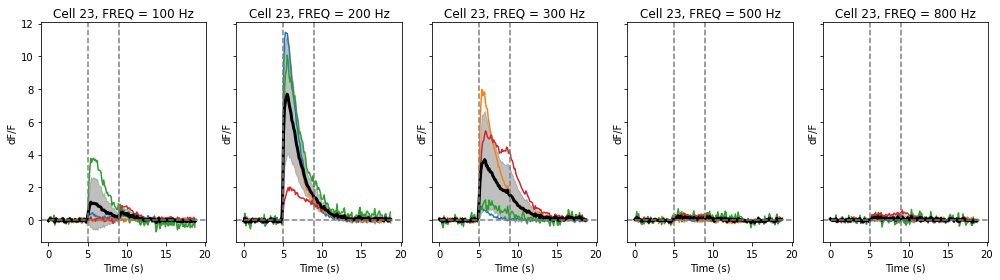

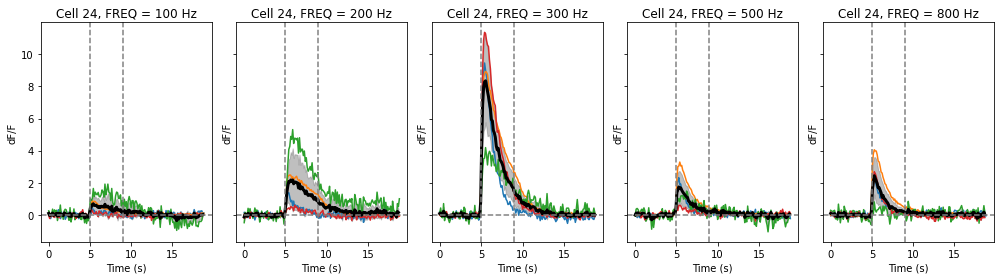

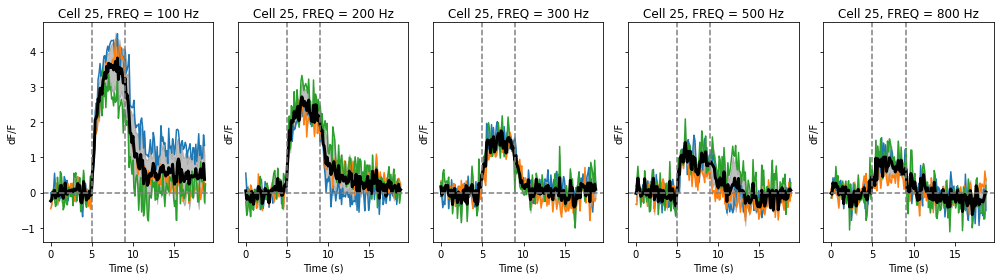

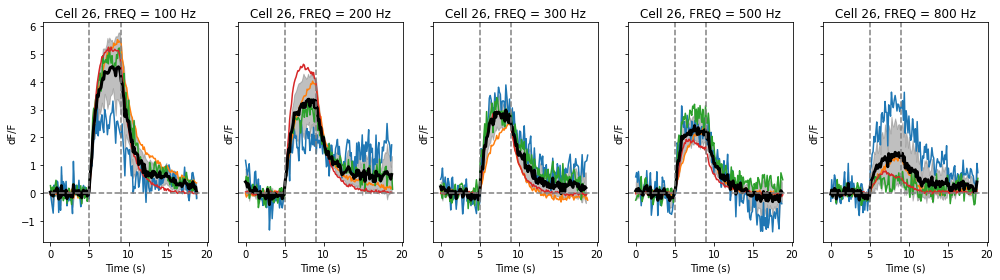

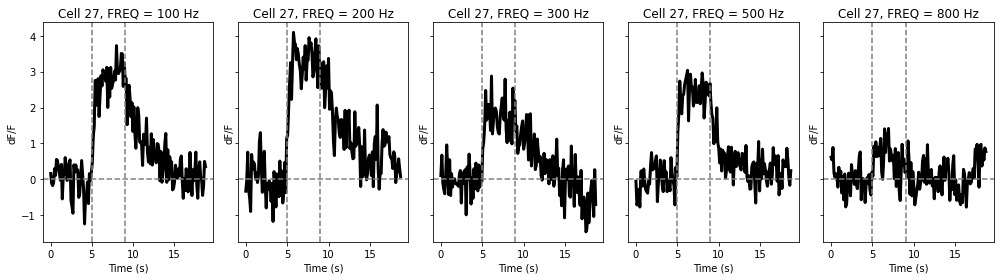

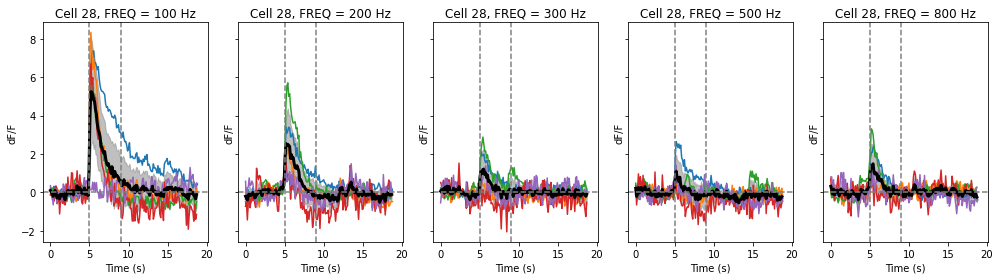

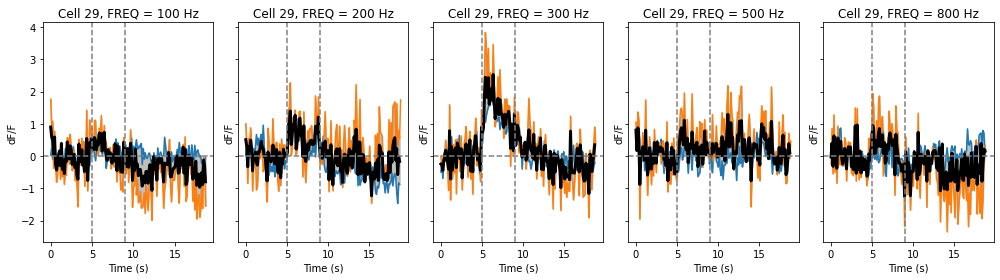

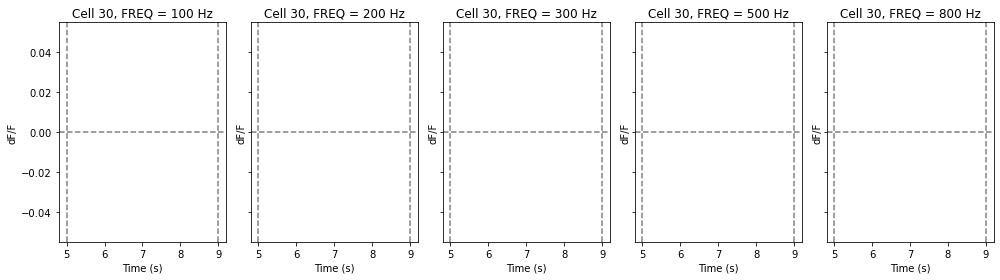

In [6]:
# print all freq tuning curves
for crsp, (rsp, rsp_mean, rsp_std) in enumerate(zip(freq_rsps_normed, freq_rsps_means, freq_rsps_stds)):
    t = np.arange(rsp.shape[1])/FPS
    fig, axs = plt.subplots(1, 5, figsize=(14, 4), sharey=True, tight_layout=True)
    for cax, (ax, freq_) in enumerate(zip(axs, freq)):
        ax.plot(t, rsp[cax])
        ax.plot(t, rsp_mean[cax], lw=3, c='k')
        ax.fill_between(t, rsp_mean[cax] - rsp_std[cax], rsp_mean[cax] + rsp_std[cax], color='gray', alpha=.5)
        ax.axhline(0, color='gray', ls='--')
        ax.axvline(5, color='gray', ls='--')
        ax.axvline(9, color='gray', ls='--')
        ax.set_title(f'Cell {crsp+1}, FREQ = {freq_} Hz')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('dF/F')

In [7]:
cell_df = pd.read_excel(CELL_FILE, engine='openpyxl')
cell_df
labels = np.array(cell_df['short name'])
line_ids = np.array(cell_df['lineID for IPI/Freq tuning curves'])
print(labels)

['A1_L1' 'A1_L2' 'A1_L3' 'A1_R1' 'A1_R2' 'A2_L' 'A2_R' 'B1-1_L1' 'B1-1_L2'
 'B1-1_L3' 'B1-1_L4' 'B1-1_L5' 'B1-1_L6' 'B1-1_R1' 'B1-1_R2' 'B1-1_R3'
 'B1-1_R4' 'B1-1_R5' 'B1-1_R6' 'B1-2_L1' 'B1-2_L2' 'B1-2_L3' 'B1-2_L4'
 'B1-2_L5' 'B1-2_L6' 'B1-2_L7' 'B1-2_L8' 'B1-2_L9' 'B1-2_R1' 'B1-2_R2'
 'B1-2_R3' 'B1-2_R4' 'B1-2_R5' 'B1-2_R6' 'B1-2_R7' 'B1-2_R8' 'B1-3_L1'
 'B1-3_L2' 'B1-3_L3' 'B1-3_L4' 'B1-3_L5' 'B1-3_R1' 'B1-3_R2' 'B1-3_R3'
 'B1-3_R4' 'B1-3_R5' 'B1-4_L1' 'B1-4_L2' 'B1-4_L3' 'B1-4_L4' 'B1-4_L5'
 'B1-4_L6' 'B1-4_L7' 'B1-4_L8' 'B1-4_L9' 'B1-4_R1' 'B1-4_R2' 'B1-4_R3'
 'B1-4_R4' 'B1-4_R5' 'B1-4_R6' 'B1-4_R7' 'B1-4_R8' 'B1-u_L1' 'B1-u_L2'
 'B1-u_L3' 'B1-u_L4' 'B1-u_L5' 'B1-u_L6' 'B1-u_L7' 'B1-u_L8' 'B1-u_L9'
 'B1-u_L10' 'B1-u_L11' 'B1-u_L12' 'B1-u_L13' 'B1-u_L14' 'B1-u_L15'
 'B1-u_L16' 'B1-u_L17' 'B1-u_L18' 'B1-u_L19' 'B1-u_L20' 'B1-u_L21'
 'B1-u_L22' 'B1-u_L23' 'B1-u_L24' 'B1-u_L25' 'B1-u_L26' 'B1-u_L27'
 'B1-u_L28' 'B1-u_L29' 'B1-u_L30' 'B1-u_L31' 'B1-u_L32' 'B1-u_R1'
 'B1-u_R2' 'B1-u_R3

In [8]:
np.unique(line_ids)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 23., 24., 25., 26., 28., 29., nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [9]:
label2line = {label: line_id for label, line_id in zip(labels, line_ids)}
label2line

{'A1_L1': nan,
 'A1_L2': nan,
 'A1_L3': nan,
 'A1_R1': nan,
 'A1_R2': nan,
 'A2_L': 10.0,
 'A2_R': 10.0,
 'B1-1_L1': 15.0,
 'B1-1_L2': 15.0,
 'B1-1_L3': 15.0,
 'B1-1_L4': 15.0,
 'B1-1_L5': 15.0,
 'B1-1_L6': 15.0,
 'B1-1_R1': 15.0,
 'B1-1_R2': 15.0,
 'B1-1_R3': 15.0,
 'B1-1_R4': 15.0,
 'B1-1_R5': 15.0,
 'B1-1_R6': 15.0,
 'B1-2_L1': 15.0,
 'B1-2_L2': 15.0,
 'B1-2_L3': 15.0,
 'B1-2_L4': 15.0,
 'B1-2_L5': 15.0,
 'B1-2_L6': 15.0,
 'B1-2_L7': 15.0,
 'B1-2_L8': 15.0,
 'B1-2_L9': 15.0,
 'B1-2_R1': 15.0,
 'B1-2_R2': 15.0,
 'B1-2_R3': 15.0,
 'B1-2_R4': 15.0,
 'B1-2_R5': 15.0,
 'B1-2_R6': 15.0,
 'B1-2_R7': 15.0,
 'B1-2_R8': 15.0,
 'B1-3_L1': 15.0,
 'B1-3_L2': 15.0,
 'B1-3_L3': 15.0,
 'B1-3_L4': 15.0,
 'B1-3_L5': 15.0,
 'B1-3_R1': 15.0,
 'B1-3_R2': 15.0,
 'B1-3_R3': 15.0,
 'B1-3_R4': 15.0,
 'B1-3_R5': 15.0,
 'B1-4_L1': 15.0,
 'B1-4_L2': 15.0,
 'B1-4_L3': 15.0,
 'B1-4_L4': 15.0,
 'B1-4_L5': 15.0,
 'B1-4_L6': 15.0,
 'B1-4_L7': 15.0,
 'B1-4_L8': 15.0,
 'B1-4_L9': 15.0,
 'B1-4_R1': 15.0,
 'B1-4_R2': 1

In [10]:
cxn_data = loadmat_h5(CXN_FILE)
w = cxn_data['cxns_noDup']
labels_cxn = cxn_data['neuronNames'][:, 0]
print(w)
print(w.shape)
print(labels_cxn)

[[ nan  42. 133. ...   0.   0.   0.]
 [ 55.  nan  77. ...   0.   0.   0.]
 [ 31.  44.  nan ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  nan   1.   6.]
 [  0.   0.   0. ...   7.  nan  11.]
 [  0.   0.   0. ...   3.   0.  nan]]
(496, 496)
['A1_L1' 'A1_L2' 'A1_L3' 'A1_R1' 'A1_R2' 'A2_L' 'A2_R' 'B1-1_L1' 'B1-1_L2'
 'B1-1_L3' 'B1-1_L4' 'B1-1_L5' 'B1-1_L6' 'B1-1_R1' 'B1-1_R2' 'B1-1_R3'
 'B1-1_R4' 'B1-1_R5' 'B1-1_R6' 'B1-2_L1' 'B1-2_L2' 'B1-2_L3' 'B1-2_L4'
 'B1-2_L5' 'B1-2_L6' 'B1-2_L7' 'B1-2_L8' 'B1-2_L9' 'B1-2_R1' 'B1-2_R2'
 'B1-2_R3' 'B1-2_R4' 'B1-2_R5' 'B1-2_R6' 'B1-2_R7' 'B1-2_R8' 'B1-3_L1'
 'B1-3_L2' 'B1-3_L3' 'B1-3_L4' 'B1-3_L5' 'B1-3_R1' 'B1-3_R2' 'B1-3_R3'
 'B1-3_R4' 'B1-3_R5' 'B1-4_L1' 'B1-4_L2' 'B1-4_L3' 'B1-4_L4' 'B1-4_L5'
 'B1-4_L6' 'B1-4_L7' 'B1-4_L8' 'B1-4_L9' 'B1-4_R1' 'B1-4_R2' 'B1-4_R3'
 'B1-4_R4' 'B1-4_R5' 'B1-4_R6' 'B1-4_R7' 'B1-4_R8' 'B1-u_L1' 'B1-u_L2'
 'B1-u_L3' 'B1-u_L4' 'B1-u_L5' 'B1-u_L6' 'B1-u_L7' 'B1-u_L8' 'B1-u_L9'
 'B1-u_L10' 'B1-u_L11' 'B1-u_L12' 'B1-u_L13' 'B